Importing Dependencies

In [344]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

Importing models

In [345]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

Load the dataset

In [346]:
data = sklearn.datasets.load_breast_cancer()

In [347]:
print(data)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

Raw data into DataFrame

In [348]:
df = pd.DataFrame(data.data, columns=data.feature_names)

In [349]:
#top 5 recods
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [350]:
# add the labels to dataframe
df['target'] = data.target

In [351]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [352]:
# shape of the data
df.shape

(569, 31)

In [353]:
#check missing values
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [354]:
# check target categorical values
df['target'].value_counts()

1    357
0    212
Name: target, dtype: int64

1 ---------------- > Benign

0 -----------------> Malignant


In [355]:
# group the target data
df.groupby('target').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
target,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Disease')

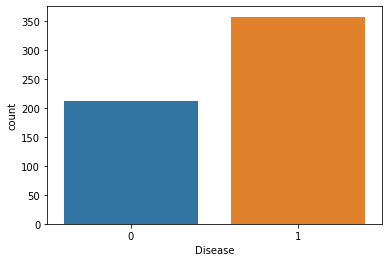

In [356]:
#target count plot
sns.countplot(df.target)
plt.xlabel('Disease')

In [357]:
# statistical measures
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [358]:
# correlation of data
correlation = df.corr()

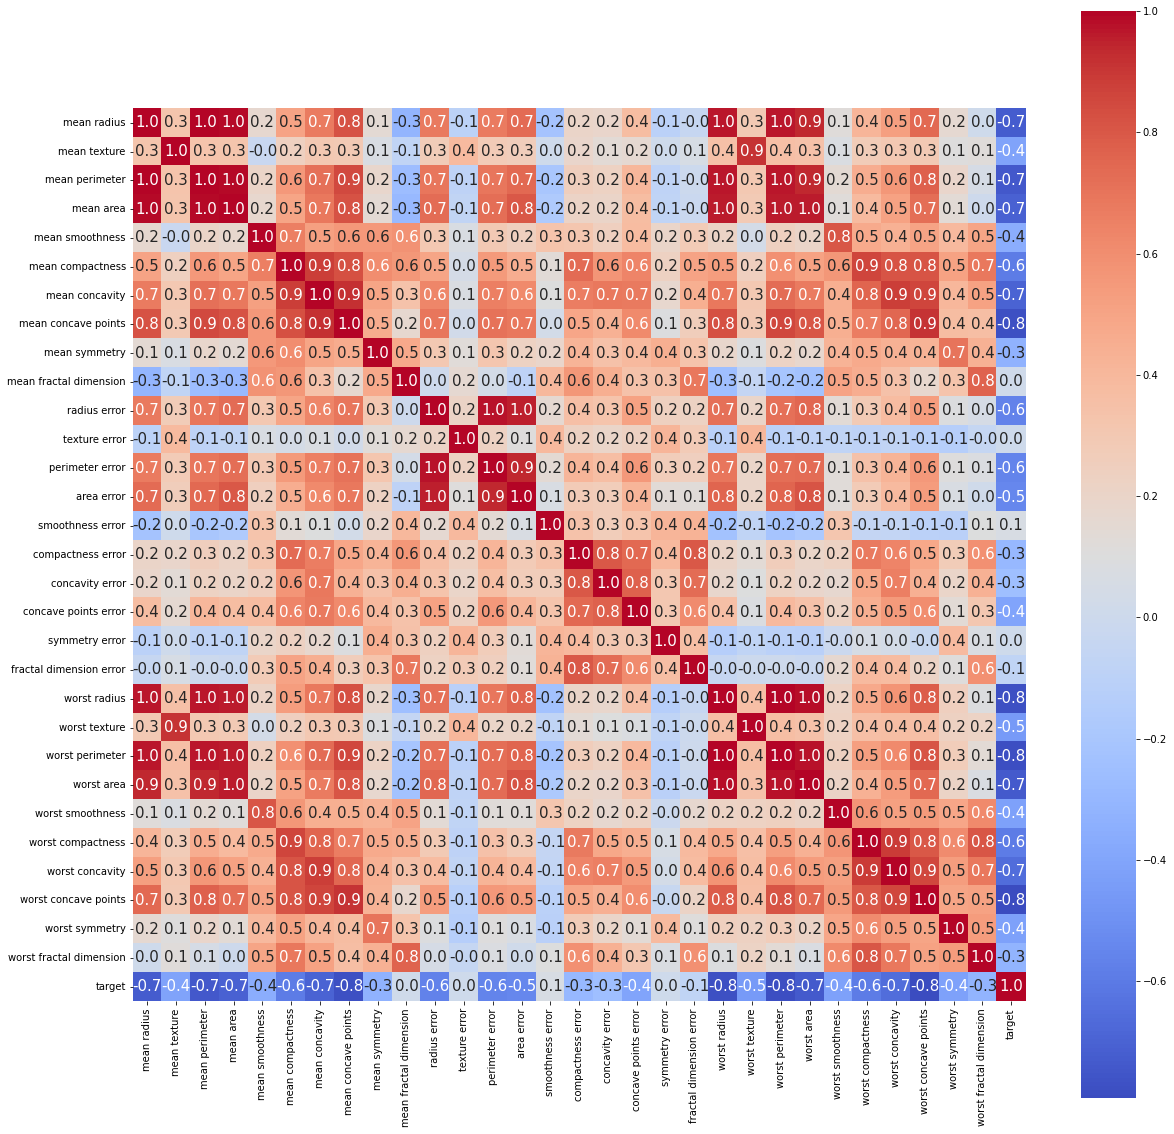

In [359]:
# heatmap presentation
plt.figure(figsize=(20,20))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='coolwarm')

Split X and Y data

In [360]:
X = df.drop(columns=['target'],axis=1)
Y = df['target']

In [361]:
print(X)
print(Y)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

# Model Selection

In [362]:
models = [LogisticRegression(max_iter=1000),SVC(kernel='linear'),RandomForestClassifier(random_state=0),KNeighborsClassifier()]

In [363]:
def cross_validation():
   for model in models:
     cross_val = cross_val_score(model,X,Y,cv=5)
     cross_val_mean = sum(cross_val)/len(cross_val)
     cross_val_pct = cross_val_mean*100
     accuracy = round(cross_val_pct, 2)
     
     print('accutacy score of', model,'is :', accuracy)



In [364]:
cross_validation()

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


accutacy score of LogisticRegression(max_iter=1000) is : 95.08
accutacy score of SVC(kernel='linear') is : 94.55
accutacy score of RandomForestClassifier(random_state=0) is : 96.31
accutacy score of KNeighborsClassifier() is : 92.79


accutacy score of LogisticRegression(max_iter=1000) is : 95.08

accutacy score of SVC(kernel='linear') is : 94.55

accutacy score of RandomForestClassifier() is : 96.31

accutacy score of KNeighborsClassifier() is : 92.79

accutacy score of RandomForestClassifier() is : 96.31 is highest value

HyperParameters

In [365]:
# check hyper parameters
model = RandomForestClassifier()

In [366]:
# parametrrs
parameters = {'n_estimators':[10, 20, 50, 100]}

In [367]:
# GridSearchCV
hyper_parameters = GridSearchCV(model,parameters,cv=5)

In [368]:
hyper_parameters

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 50, 100]})

In [369]:
hyper_parameters.fit(X, Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 20, 50, 100]})

In [370]:
#chech results
hyper_parameters.cv_results_

{'mean_fit_time': array([0.02415166, 0.04502983, 0.10380788, 0.20899062]),
 'std_fit_time': array([0.00245923, 0.00246979, 0.00260622, 0.00720299]),
 'mean_score_time': array([0.00335507, 0.00452237, 0.00796318, 0.0154943 ]),
 'std_score_time': array([7.05917756e-05, 4.58263581e-05, 6.60549368e-04, 3.84487938e-03]),
 'param_n_estimators': masked_array(data=[10, 20, 50, 100],
              mask=[False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 10},
  {'n_estimators': 20},
  {'n_estimators': 50},
  {'n_estimators': 100}],
 'split0_test_score': array([0.92105263, 0.92105263, 0.92105263, 0.92982456]),
 'split1_test_score': array([0.95614035, 0.95614035, 0.95614035, 0.92982456]),
 'split2_test_score': array([0.97368421, 0.98245614, 0.98245614, 0.98245614]),
 'split3_test_score': array([0.94736842, 0.97368421, 0.98245614, 0.97368421]),
 'split4_test_score': array([0.99115044, 0.95575221, 0.97345133, 0.98230088]),
 'mean_test_score'

In [371]:
# make a dataframe to result data
params_data = pd.DataFrame(hyper_parameters.cv_results_)

In [372]:
# top 5 recods of params_data
params_data.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.024152,0.002459,0.003355,0.000071,10,{'n_estimators': 10},0.921053,0.956140,0.973684,0.947368,0.991150,0.957879,0.023776,3
1,0.045030,0.002470,0.004522,0.000046,20,{'n_estimators': 20},0.921053,0.956140,0.982456,0.973684,0.955752,0.957817,0.021060,4
2,0.103808,0.002606,0.007963,0.000661,50,{'n_estimators': 50},0.921053,0.956140,0.982456,0.982456,0.973451,0.963111,0.023121,1
3,0.208991,0.007203,0.015494,0.003845,100,{'n_estimators': 100},0.929825,0.929825,0.982456,0.973684,0.982301,0.959618,0.024533,2


In [373]:
# check best parameter
best_parameter = params_data[['param_n_estimators', 'params', 'mean_test_score', 'rank_test_score']]

In [374]:
best_parameter.head()

,param_n_estimators,params,mean_test_score,rank_test_score
0,10,{'n_estimators': 10},0.957879,3
1,20,{'n_estimators': 20},0.957817,4
2,50,{'n_estimators': 50},0.963111,1
3,100,{'n_estimators': 100},0.959618,2


# 50	{'n_estimators': 50}	0.963127	 is best ***parameter*** 

# Train_Test_Split

In [375]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [376]:
print(X_train.shape,X_test.shape,df.shape)

(455, 30) (114, 30) (569, 31)


In [377]:
#load model
RFC = RandomForestClassifier(n_estimators=50)

In [378]:
#fit model
RFC.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50)

# *Model Evaluation*

train data

In [379]:
X_train_pred = RFC.predict(X_train)

In [380]:
X_train_acc = accuracy_score(X_train_pred,Y_train)

In [381]:
print('X_train accuracy score :', X_train_acc)

X_train accuracy score : 1.0


test data

In [382]:
X_test_pred = RFC.predict(X_test)

In [383]:
X_test_acc = accuracy_score(X_test_pred,Y_test)

In [384]:
print('X_train accuracy score :', X_test_acc)

X_train accuracy score : 0.9824561403508771


In [385]:
#confusion matrics
from sklearn.metrics import confusion_matrix, f1_score

In [386]:
cf_matrics = confusion_matrix(X_test_pred,Y_test)

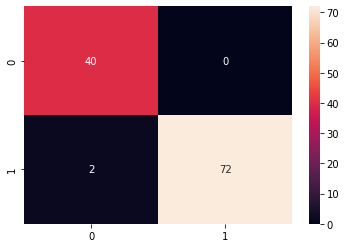

In [387]:
sns.heatmap(cf_matrics, annot=True)

In [388]:
# f1 score
f1_score_value = f1_score(X_test_pred,Y_test)

In [389]:
print('f1 score value is :', f1_score_value)

f1 score value is : 0.9863013698630138


# Check the System

In [391]:
# input 
input = (13.61,24.98,88.05,582.7,0.09488,0.08511,0.08625,0.04489,0.1609,0.05871,0.4565,1.29,2.861,43.14,0.005872,0.01488,0.02647,0.009921,0.01465,0.002355,16.99,35.27,108.6,906.5,0.1265,0.1943,0.3169,0.1184,0.2651,0.07397)

#convert the data type
input_array = np.asarray(input)

#reshape the  array
input_array_reshape = input_array.reshape(1,-1)

#prediction

prediction = RFC.predict(input_array_reshape)

print(prediction)


# condition 
if (prediction[0]==0):
  print("Malignant")
else:
  print('Benign')

[0]
Malignant


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
